In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pylab as plt 
%matplotlib inline

In [2]:
# clean up the data a bit

DataFrame = pd.read_csv("Data/FIFA 2018 Statistics.csv")
DataFrame = DataFrame.drop("Own goals",1)
df = DataFrame.drop("Own goal Time",1)
df = df.drop("1st Goal",1)
dfOutcome = pd.DataFrame()
dfOutcome["Man of the Match"] = df["Man of the Match"].replace(to_replace="Yes",value=1).replace(to_replace="No",value=0)
dfOutcome.head()
#df.info()

,Man of the Match
0,1
1,0
2,0
3,1
4,0


In [3]:
df.corr()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Goals in PSO
Goal Scored,1.000000,0.034759,0.144915,0.461702,-0.020374,-0.087072,0.040446,0.045105,0.046815,-0.118893,0.135688,0.043971,0.014355,0.030331,-0.048838,-0.035031,-0.089714,-0.011204
Ball Possession %,0.034759,1.000000,0.541185,0.297234,0.361767,0.521510,0.542992,0.057706,0.273831,-0.293658,0.713872,0.880611,-0.059054,-0.296477,-0.205511,0.090924,0.024316,-0.010086
Attempts,0.144915,0.541185,1.000000,0.731243,0.718972,0.754307,0.686892,-0.016508,0.140850,-0.268217,0.397614,0.582831,0.171381,-0.248773,-0.185544,-0.074594,0.009795,0.149836
On-Target,0.461702,0.297234,0.731243,1.000000,0.324672,0.331333,0.407576,0.073176,0.093090,-0.321557,0.291659,0.348099,0.065475,-0.192242,-0.115259,-0.051742,-0.023439,0.040322
Off-Target,-0.020374,0.361767,0.718972,0.324672,1.000000,0.299712,0.440633,-0.095919,0.142367,-0.126644,0.189760,0.398949,0.229930,-0.186858,-0.124094,-0.145577,-0.119332,0.185807
Blocked,-0.087072,0.521510,0.754307,0.331333,0.299712,1.000000,0.636172,-0.002231,0.086021,-0.142960,0.401699,0.532913,0.082111,-0.174606,-0.163111,0.033717,0.165295,0.108220
Corners,0.040446,0.542992,0.686892,0.407576,0.440633,0.636172,1.000000,-0.034054,0.085216,-0.233787,0.330363,0.524661,0.099700,-0.165382,-0.169929,0.014543,0.117960,0.088997
Offsides,0.045105,0.057706,-0.016508,0.073176,-0.095919,-0.002231,-0.034054,1.000000,0.089121,0.006539,0.127421,0.034715,0.031324,-0.040084,-0.047757,0.228531,-0.036432,-0.064892
Free Kicks,0.046815,0.273831,0.140850,0.093090,0.142367,0.086021,0.085216,0.089121,1.000000,-0.231637,0.131951,0.175695,0.076927,0.080341,-0.026741,0.029701,-0.104164,0.138046
Saves,-0.118893,-0.293658,-0.268217,-0.321557,-0.126644,-0.142960,-0.233787,0.006539,-0.231637,1.000000,-0.190740,-0.264425,0.125645,0.074976,0.009670,0.140307,0.016875,0.110014


In [4]:
features = ["Goal Scored","Ball Possession %","Offsides","Distance Covered (Kms)","Red"]
df = df[features]
df.head()

,Goal Scored,Ball Possession %,Offsides,Distance Covered (Kms),Red
0,5,40,3,118,0
1,0,60,1,105,0
2,0,43,1,112,0
3,1,57,1,111,0
4,0,64,0,101,0


In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10,20,30,40,30,20,10), random_state=1,max_iter=2000)
clf.fit(df,dfOutcome)
#clf.predict([[0,0,10,12,5]])
clf.score(df,dfOutcome)

In [6]:
clf.predict([[1,50,1,105,0]])

array([1], dtype=int64)

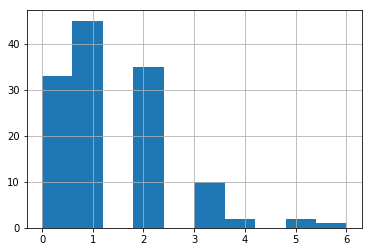

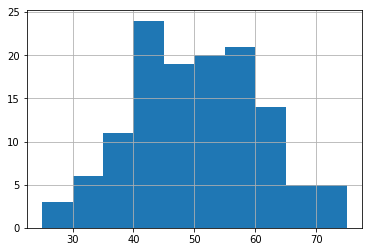

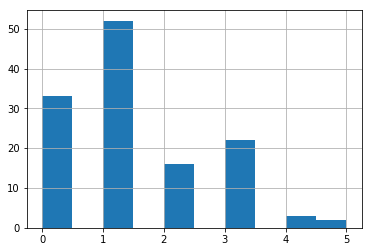

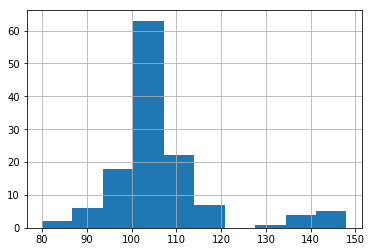

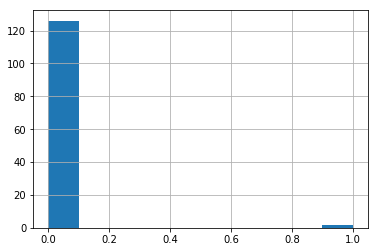

In [7]:
df["Goal Scored"].hist()
plt.show()
df["Ball Possession %"].hist()
plt.show()
df["Offsides"].hist()
plt.show()
df["Distance Covered (Kms)"].hist()
plt.show()
df["Red"].hist()